In this notebook we will see problems caused by latent variables. We start by learning a BN from a dataset called "latent.dat".

Using license file /home/james/gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter PreCrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter CutPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter GomoryPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter ZeroHalfCuts to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPGapAbs to 0.0
   Prev: 1e-10  Min: 0.0  Max: inf  Default: 1e-10
**********
BN has score -47095.73985251983
**********
A<- -10995.31277923398
B<-A,E -7147.3928675571005
E<- -10911.8504220803
C<-D,E -7055.36961708474
D<- -10985.814166563709
**********
bnlearn modelstring = 
[A][B|E:A][E][C|D:E][D]
**********
CPDAG:
Vertices: A,B,E,C,D
A->B


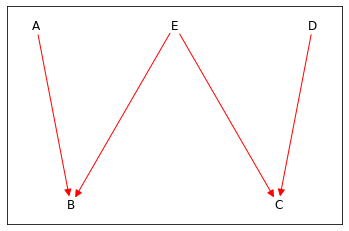

In [1]:
from pygobnilp.gobnilp import Gobnilp
m = Gobnilp()
m.learn("latent.dat")

In fact the data "latent.dat" is synthetic data generated from a BN with the same structure as the one just learned. So we have successfully learned the 'true' network. It is useful to look at the local scores for each of the five variables. (These are 'BDeu' local scores with the equivalent sample size parameter set to 1.)

In [2]:
for child, scored_parentsets in m.local_scores.items():
    print(child)
    for pas, score in scored_parentsets.items():
        print('\t',pas,score)

A
	 frozenset() -10995.31277923398
	 frozenset({'B'}) -9261.366308775898
	 frozenset({'E', 'B'}) -9031.158112153433
B
	 frozenset() -9739.922761872192
	 frozenset({'A'}) -8005.97629141411
	 frozenset({'E'}) -9132.864764306818
	 frozenset({'E', 'A'}) -7147.3928675571005
C
	 frozenset() -7119.059423788
	 frozenset({'D'}) -7078.349701120504
	 frozenset({'D', 'E'}) -7055.36961708474
D
	 frozenset() -10985.814166563709
	 frozenset({'C'}) -10945.104443896213
	 frozenset({'E', 'C'}) -10925.541722470429
E
	 frozenset() -10911.8504220803
	 frozenset({'B'}) -10304.792424514926
	 frozenset({'A', 'B'}) -10074.584227892461
	 frozenset({'D', 'C'}) -10908.350883139276


The key variable is B. The local score for B having both A and E as parents is much better than any other options. For C having both D and E as parents is a little better than D alone. For A, C and E, having no parent is not that much worse than the other options. (Note that many possible parent sets have been 'pruned' away.) 
As a result we get the 'W' shaped BN where B and C are **not** independent.
Consider the conditional independence relations between variables A, B, C and D (ignoring E) represented by the learned BN. 
1. $A \perp C$
2. $A \perp D$
3. $B \perp D$
4. $A \perp D | B$
5. $A \perp D | C$
6. $B \perp D | A$

None of the 543 DAGs on 4 variables have these and only these 6 conditional independence relations. So what happens when we learn using just the variables A,B,C and D, so that E becomes a *latent* variable? Let's see.

**********
BN has score -37065.4529383323
**********
A<-B -9261.366308775898
B<- -9739.922761872192
C<-D -7078.349701120504
D<- -10985.814166563709
**********
bnlearn modelstring = 
[A|B][B][C|D][D]
**********
CPDAG:
Vertices: A,B,C,D
B-A
D-C



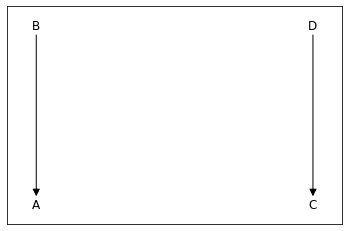

In [3]:
m.set_bn_variables('ABCD')
m.learn(start='data',palim=None)

We end up with a 4 node BN where $B \perp C$, even though when E was present we learned a BN where $B \not \perp C$. This just basically shows the limitations of Gobnilp's form of learning when there are latent variables.

The remainder of this notebook just shows the results of learning on various subsets of the original variables.

**********
BN has score -26120.34849443609
**********
A<- -10995.31277923398
B<-A -8005.97629141411
C<- -7119.059423788
**********
bnlearn modelstring = 
[A][B|A][C]
**********
CPDAG:
Vertices: A,B,C
A-B



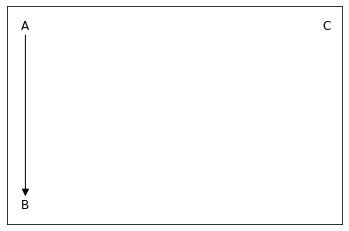

In [4]:
m.set_bn_variables('ABC')
m.learn(start='data')

**********
BN has score -27804.086629556405
**********
B<- -9739.922761872192
C<- -7119.059423788
D<-C -10945.104443896213
**********
bnlearn modelstring = 
[B][C][D|C]
**********
CPDAG:
Vertices: B,C,D
C-D



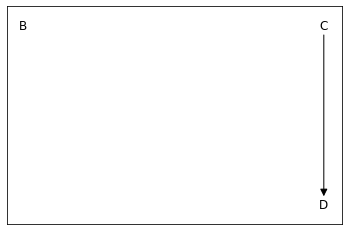

In [5]:
m.set_bn_variables('BCD')
m.learn(start='data')

**********
BN has score -16858.982185660192
**********
B<- -9739.922761872192
C<- -7119.059423788
**********
bnlearn modelstring = 
[B][C]
**********
CPDAG:
Vertices: B,C



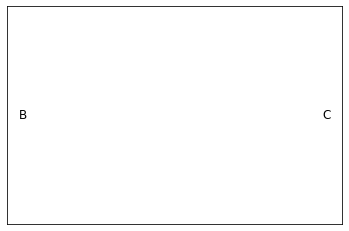

In [6]:
m.set_bn_variables('BC')
m.learn(start='data')